<a href="https://colab.research.google.com/github/allispaul/audiobot/blob/main/models/GTZAN_Fastai_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from fastai.vision.all import *

import os
import numpy



# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path = '/content/drive/MyDrive/Colab Notebooks/Erdos Institute Boot Camp/Audiobots/Data/GTZAN/mel'


In [3]:
# When this shit works out, god we love fastai
# Not when their API conflicts with Transformers API 😠
# More comments should have emojis, shouldn't they 🤔

songs = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=GrandparentSplitter(train_name='train', valid_name='test'),
                 get_y=parent_label)

dls = songs.dataloaders(path)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 143MB/s]


SuggestedLRs(valley=0.0012022644514217973)

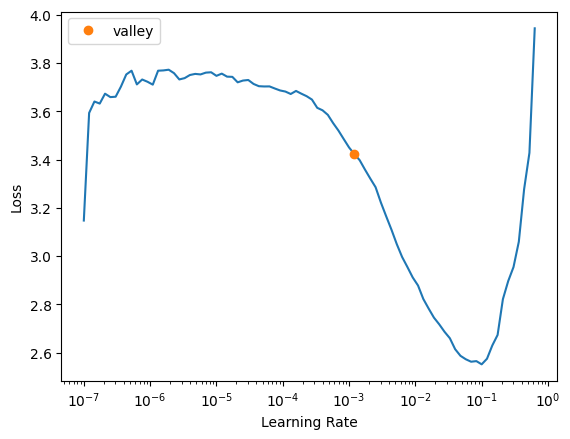

In [4]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.lr_find()

Straight from [Fastbook](https://github.com/fastai/fastbook/blob/master/05_pet_breeds.ipynb)

In [5]:
learn.fit_one_cycle(5, 1e-3)

epoch,train_loss,valid_loss,error_rate,time
0,3.410465,2.952207,0.770000,00:30
1,2.643473,2.762702,0.680000,00:08
2,2.043424,2.176396,0.580000,00:07
3,1.629160,1.625742,0.450000,00:08
4,1.357860,1.367552,0.420000,00:07


In [6]:
learn.unfreeze()

SuggestedLRs(valley=5.248074739938602e-05)

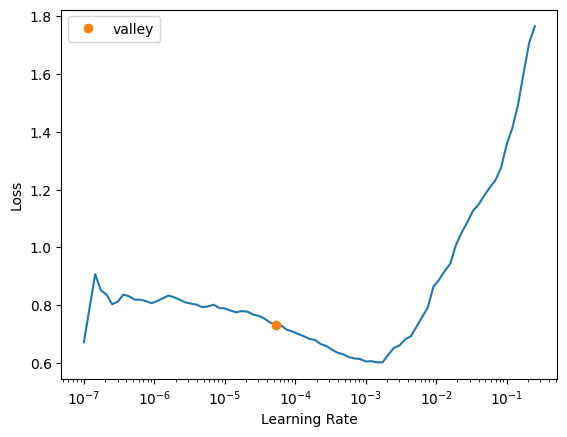

In [7]:
learn.lr_find()

In [8]:
learn.fit_one_cycle(12, lr_max=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.808588,1.344798,0.410000,00:07
1,0.775181,1.321918,0.390000,00:08
2,0.739846,1.317157,0.420000,00:07
3,0.668474,1.276277,0.410000,00:08
4,0.603623,1.269567,0.370000,00:07
5,0.532021,1.268646,0.360000,00:07
6,0.469275,1.262640,0.360000,00:08
7,0.419626,1.256263,0.360000,00:07
8,0.373188,1.239904,0.360000,00:08
9,0.338956,1.240465,0.340000,00:08


LOG


In [10]:
path = '/content/drive/MyDrive/Colab Notebooks/Erdos Institute Boot Camp/Audiobots/Data/GTZAN/log'


In [11]:
# When this shit works out, god we love fastai
# Not when their API conflicts with Transformers API 😠
# More comments should have emojis, shouldn't they 🤔

songs = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=GrandparentSplitter(train_name='train', valid_name='test'),
                 get_y=parent_label)

dls = songs.dataloaders(path)

SuggestedLRs(valley=0.0004786300996784121)

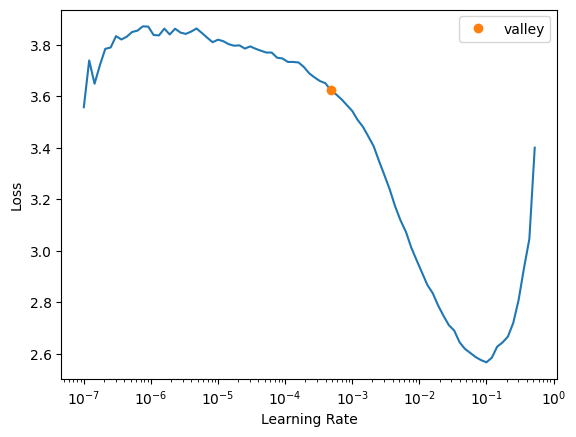

In [12]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.lr_find()

In [13]:
learn.fine_tune(6, base_lr=1e-3)
# I know I know, this is different than above. I just wanted to see how it did; if separating manually was worth

epoch,train_loss,valid_loss,error_rate,time
0,3.406406,2.886280,0.830000,00:29


epoch,train_loss,valid_loss,error_rate,time
0,2.283788,2.384314,0.730000,00:08
1,1.757904,1.640721,0.510000,00:07
2,1.292214,1.158229,0.380000,00:08
3,0.958444,1.051263,0.300000,00:08
4,0.735782,1.074124,0.330000,00:08
5,0.583690,1.074928,0.320000,00:08


Okay, so neither of them does so hot, and it looks like we're overfitting (the val_loss is still dropping, but the err-- oh fuck me, error rate =/= accuracy, lmao).

So we're at like 70% accuracy. Not as good as before.
